In [22]:
from IPython.display import Markdown as md
from IPython.display import SVG
import sympy as sp
from sympy import symbols

x = symbols("x",positive = True)
yp = symbols("y^{\prime}")
ypp = symbols("y^{\prime\prime}")
y = symbols("y", positive = True)
A = symbols("A", positive = True)
C= symbols("C")
l = symbols("\lambda", negative = True)
s = symbols("s", positive = True)
V = symbols("V", positive = True)
r = symbols("r", positive = True)


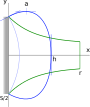

In [23]:
SVG(filename ="drawing.svg")

Minimize surface
$$
dS = 2 \pi\sqrt{1+(y^{\prime})^2} (r-x) dx
$$
with constant volume
$$
dV = 2 \pi y (r-x) dx
$$
Functional to minimize
$$
F = S + \lambda V
$$

other constrains:
$$
y(0) = s/2
\\
\lim_{x \to h} y(x) = 0
\\
\lim_{x \to h} y^{\prime}(x) = -\infty
\\
y^{\prime\prime}(x) < 0
$$

$$
F(y^{\prime}, y) = 2 \pi (\sqrt{1+(y^{\prime})^2} (r-x) + \lambda 2 y (r-x))
$$

Euler-Lagrange
$$
\frac{\partial F}{\partial y} - \frac{d}{dx} \frac{\partial F}{\partial y^{\prime}} = 0
$$

In [24]:
F = sp.sqrt(1+yp**2)*2*sp.pi*(r-x) + l*y*2*sp.pi*(r-x)
display(sp.Eq(F, 0))
dFdy = F.diff(y)
md(r"$$\frac{\partial F}{\partial y}="+f"{sp.latex(dFdy)}$$")

Eq(2*pi*\lambda*y*(r - x) + 2*pi*(r - x)*sqrt(y^{\prime}**2 + 1), 0)

$$\frac{\partial F}{\partial y}=2 \pi \lambda \left(r - x\right)$$

In [25]:
ypf = sp.Function("y^{\prime}")(x)
dFdyp = F.diff(yp).subs(yp, ypf).diff(x).subs(ypf.diff(x), ypp)
dFdyp = dFdyp.subs(ypf, yp)
print("second")
md(r"$$\frac{d}{dx} \frac{\partial F}{\partial y^{\prime}}=" + f"{sp.latex(dFdyp)}$$")

second


$$\frac{d}{dx} \frac{\partial F}{\partial y^{\prime}}=- \frac{2 \pi y^{\prime\prime} \left(y^{\prime}\right)^{2} \left(r - x\right)}{\left(\left(y^{\prime}\right)^{2} + 1\right)^{\frac{3}{2}}} + \frac{2 \pi y^{\prime\prime} \left(r - x\right)}{\sqrt{\left(y^{\prime}\right)^{2} + 1}} - \frac{2 \pi y^{\prime}}{\sqrt{\left(y^{\prime}\right)^{2} + 1}}$$

In [26]:
eq = sp.Eq(dFdy/2/sp.pi, dFdyp/2/sp.pi).simplify()
display(eq)

Eq(\lambda*(r - x), (r*y^{\prime\prime} - x*y^{\prime\prime} - y^{\prime}**3 - y^{\prime})/(y^{\prime}**2 + 1)**(3/2))

In [27]:
lhs = (eq.args[0]).subs(r-x, 1)
rhs = (eq.args[1]).collect(ypp).subs(r-x, 1)
eq = sp.Eq(rhs**1, lhs**1)
display(eq)

Eq((y^{\prime\prime} - y^{\prime}**3 - y^{\prime})/(y^{\prime}**2 + 1)**(3/2), \lambda)

In [28]:
ypp_roots = sp.solve(eq, ypp)
display(*[sp.Eq(ypp, root) for root in ypp_roots])

Eq(y^{\prime\prime}, \lambda*(y^{\prime}**2 + 1)**(3/2) + y^{\prime}**3 + y^{\prime})

In [9]:
ypp_ = ypp_roots[1]

In [10]:
ypp_ = ypp_roots[1]
dx, dy = symbols("dx d(y')")
lhs = sp.solve((ypp_ - ypp).subs(ypp, dy/dx), dx)[0]

In [11]:
lhs

d(y')/(\lambda*sqrt((y^{\prime}**2 + 1)**3) + y^{\prime}**3 + y^{\prime})

In [12]:
ypp_

\lambda*sqrt((y^{\prime}**2 + 1)**3) + y^{\prime}**3 + y^{\prime}